#### Probabilistic Models Final Project
#### Modeling and Inferring Airline Passenger Satisfaction

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os
# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [20]:
#loading the data
data_raw=pd.read_csv("train.csv").drop('Unnamed: 0', axis=1)
data_raw

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [26]:
data_raw['id'].is_unique

True

In [4]:
data['Gender']=data['Gender'].map(dict({'Male': 0, 'Female': 1}))
data['Customer Type']=data['Customer Type'].map(dict({'disloyal Customer': 0, 'Loyal Customer': 1}))
data['Type of Travel']=data['Type of Travel'].map(dict({'Personal Travel': 0, 'Business travel': 1}))
#data['Class']=data['Class'].map(dict({'Eco Plus': 0, 'Business': 1, 'Eco': 2}))
data['satisfaction']=data['satisfaction'].map(dict({'neutral or dissatisfied': 0, 'satisfied': 1}))

In [5]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
def oheColumn(oheData, columnName):
    oneHotEnc = OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [7]:
data = oheColumn(data, 'Class').drop('Class', axis=1)

In [8]:
data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,1,6.0,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,11,9.0,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,192,2,1,2,3,...,4,2,3,2,3,0.0,0,0,1,0
103900,73097,0,1,49,1,2347,4,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,68825,0,0,30,1,1995,1,1,1,3,...,4,5,5,4,7,14.0,0,1,0,0
103902,54173,1,0,22,1,1000,1,1,1,5,...,1,5,4,1,0,0.0,0,0,1,0


In [9]:
print(data.iloc[:,0:27].isna().sum())

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
Class_Business                         0
Class_Eco       

In [10]:
#Filling in nan values
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(0)

In [11]:
print(data.iloc[:,0:27].isna().sum())

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus           

In [12]:
data=data.drop_duplicates()

In [13]:
data.shape

(103904, 26)

<AxesSubplot:>

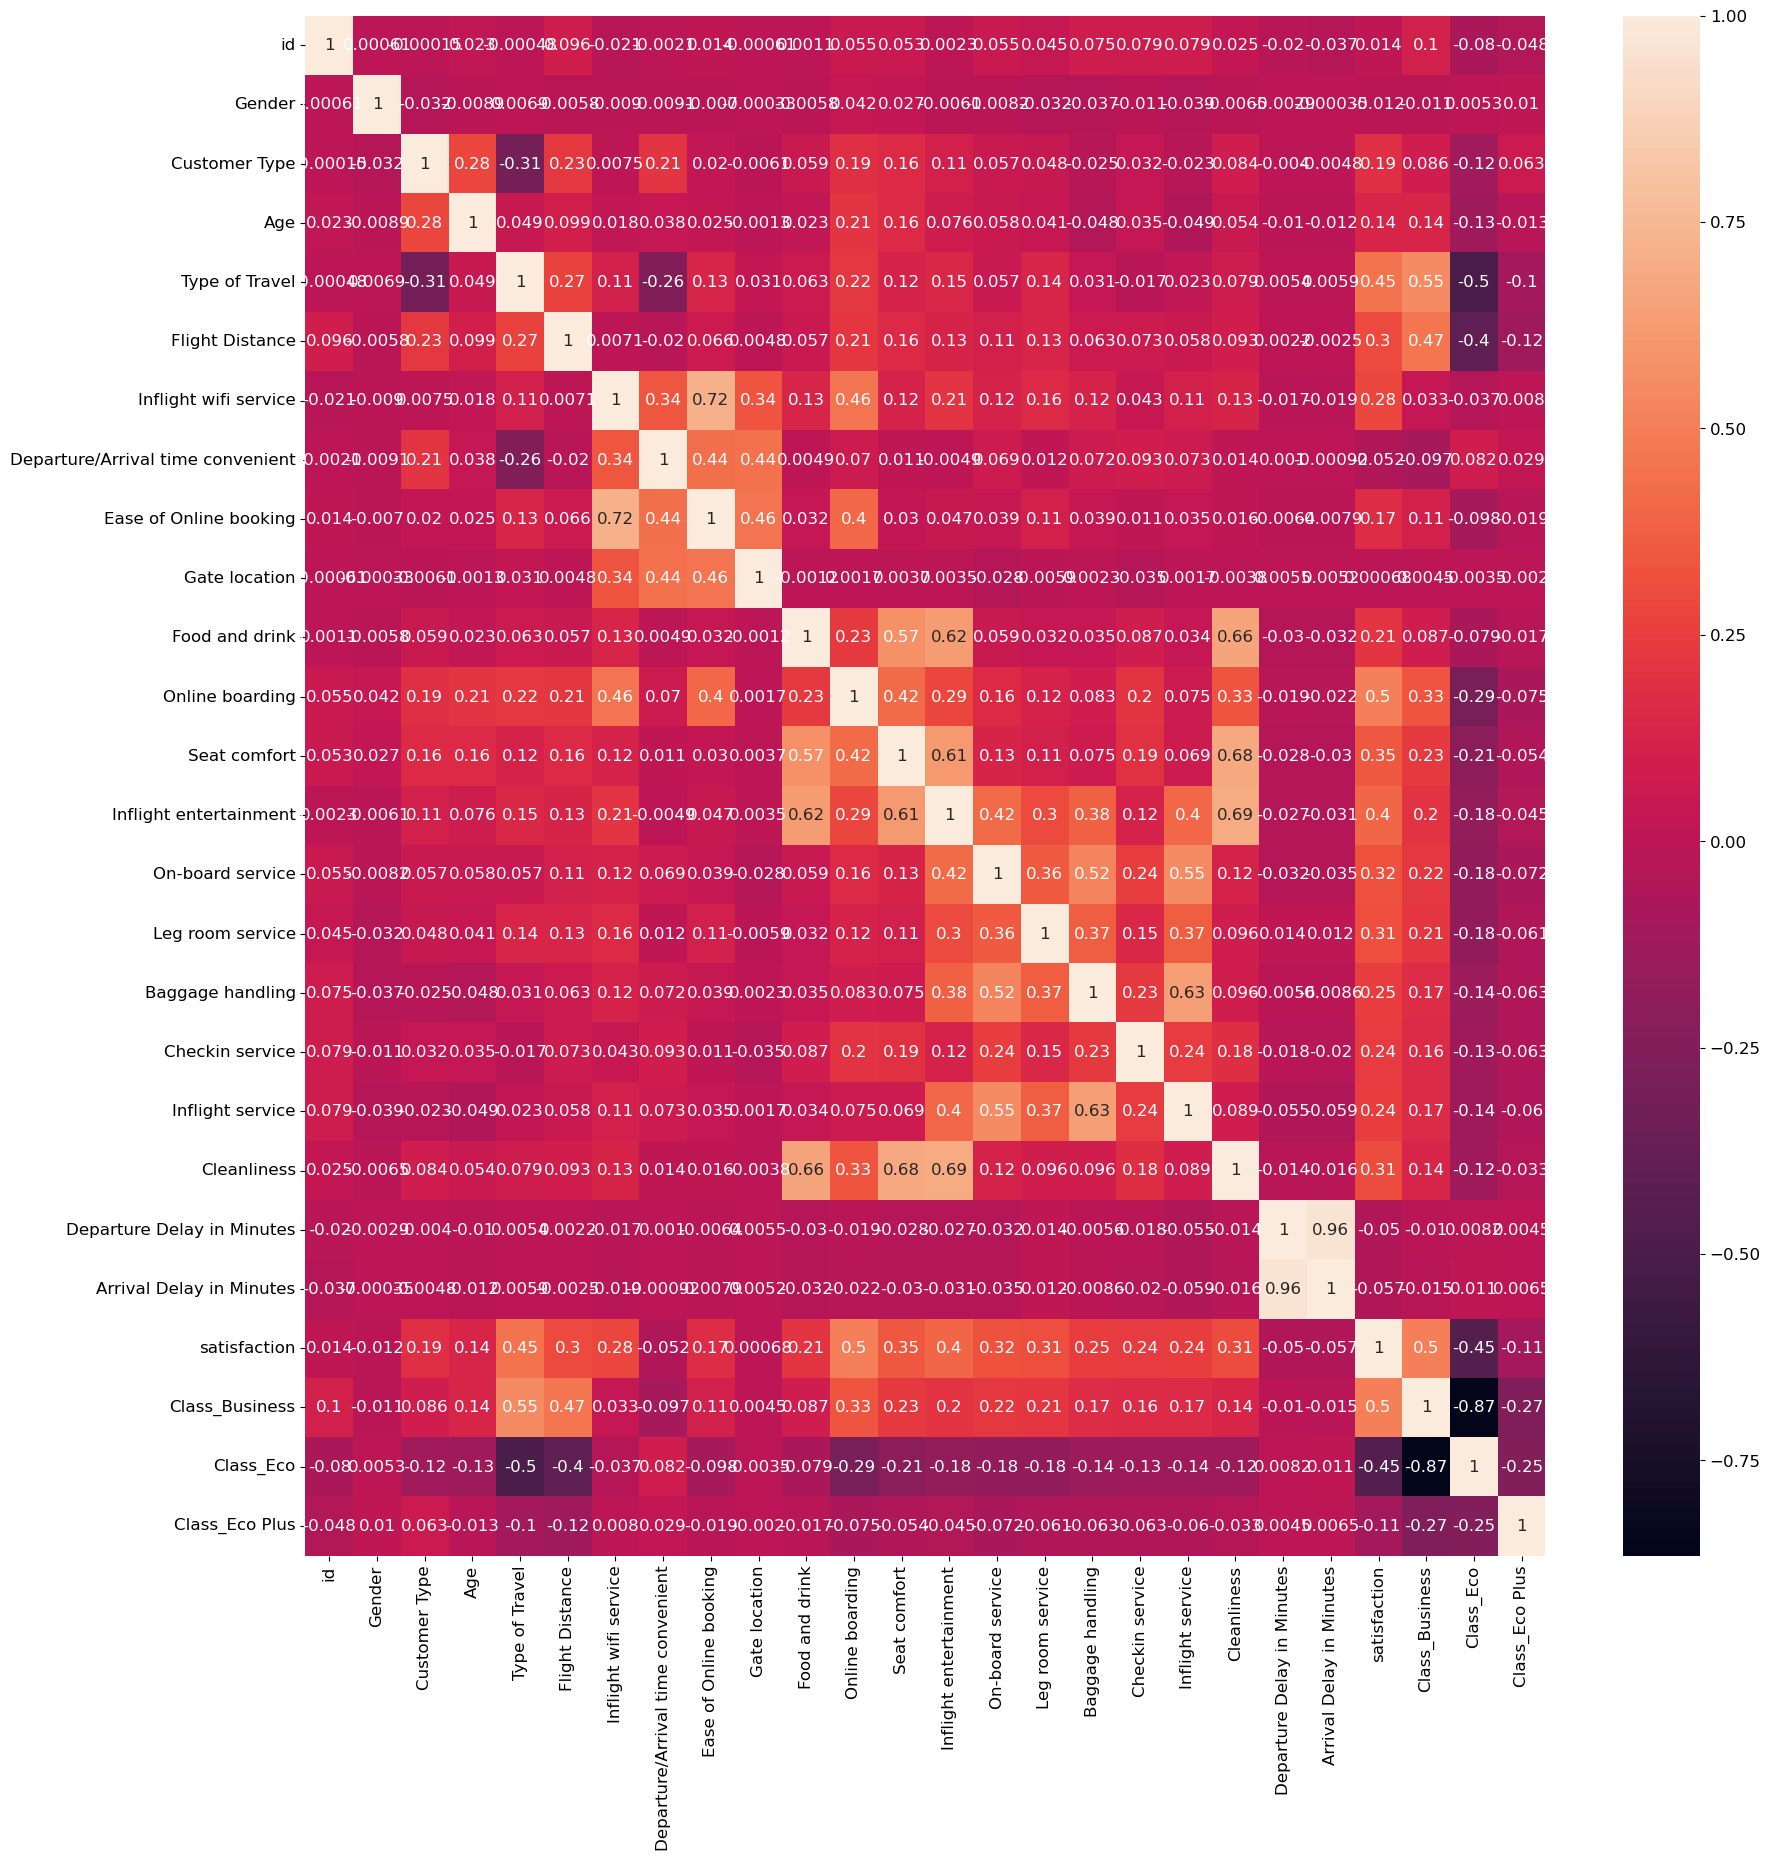

In [16]:
data_corr=data.corr()



fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr, annot=True, ax=ax)

In [29]:
correlated_features=data_corr[(data_corr > 0.5) | (data_corr < -0.5)].stack().index
correlated_features_df=pd.DataFrame(correlated_features)
correlated_features_df=pd.DataFrame(correlated_features_df[0].tolist(),index=correlated_features_df.index)
correlated_features_df=correlated_features_df[correlated_features_df.loc[:,0] != correlated_features_df.loc[:,1]]

In [30]:
correlated_features_df[0].unique()

array(['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Business', 'Class_Eco'], dtype=object)